In [1]:
%matplotlib notebook
import numpy as np
import scipy.signal as signal
import matplotlib
import matplotlib.pyplot as plt


class Event:
    def __init__(self):
        self.timestamp = datetime.datetime.now()
        self.event_id = 0
        self.fiber1_id = 0
        self.fiber2_id = 0
        self.fiber1_sensors = []
        self.fiber2_sensors = []
        self.info = ''
        self.wav1 = []
        self.wav2 = []
    

# look for large slope in the time sequence
def event_detection(data_trace, threshold=0.001, seg_length=3):
    event_flag = []
    for i in range(int(len(data_trace) / seg_length)):
        event_flag.append(define_baseline_alg1(data_trace[i * seg_length:(i + 1) * seg_length], threshold=threshold))
        # event_flag = define_baseline_alg2(data_trace, moving_ave, threshold=0.001)
    return event_flag


def define_baseline_alg1(data_seg, threshold):
    if np.max(np.abs(data_seg - np.median(data_seg))) > threshold:
        return 1
    else:
        return 0


def axle_qc_alg3(event, lane_sensor):
    # pick sensor that produces the min signal on either half of the lane. certain overlap region
    k_1 = np.min(event.wav1[:, lane_sensor[0:7]], axis=0).argmin()
    l_1 = np.min(event.wav1[:, lane_sensor[5:]], axis=0).argmin()
    k_2 = np.min(event.wav2[:, lane_sensor[0:7]], axis=0).argmin()
    l_2 = np.min(event.wav2[:, lane_sensor[5:]], axis=0).argmin()

    trace_temp1 = np.abs(event.wav1[:, lane_sensor[k_1]]) + np.abs \
        (event.wav1[:, lane_sensor[5 + l_1]])
    trace_temp2 = np.abs(event.wav2[:, lane_sensor[k_2]]) + np.abs \
        (event.wav2[:, lane_sensor[5 + l_2]])

    signal_strength = np.max([np.max(trace_temp1), np.max(trace_temp2)])

    if signal_strength > 0.05:
        # threshold 0.003 for Francis; 0.0015 for M80
        filter_threshold = 0.003
    else:
        # threshold 0.0015 for Francis; 0.0008 - 0.001 for M80
        filter_threshold = 0.0015

    axle_filter_1 = event_detection(trace_temp1, threshold=filter_threshold, seg_length=3)
    axle_filter_2 = event_detection(trace_temp2, threshold=filter_threshold, seg_length=3)
    ax_count_1 = signal.find_peaks(axle_filter_1, prominence=0.5, distance=3)
    ax_count_2 = signal.find_peaks(axle_filter_2, prominence=0.5, distance=3)
    ax_count = np.max([len(ax_count_1[0]), len(ax_count_2[0])])

    # if vehicle too light
    if ax_count < 2:
        axle_filter_1 = event_detection(trace_temp1, threshold=0.001, seg_length=3)
        axle_filter_2 = event_detection(trace_temp2, threshold=0.001, seg_length=3)
        ax_count_1 = signal.find_peaks(axle_filter_1, prominence=0.5, distance=3)
        ax_count_2 = signal.find_peaks(axle_filter_2, prominence=0.5, distance=3)
        ax_count = np.min([len(ax_count_1[0]), len(ax_count_2[0])])

    if ax_count >= 2:
        if len(ax_count_1[0]) > len(ax_count_2[0]):
            ax_list = (ax_count_1[1]['left_bases'] + ax_count_1[1]['right_bases']) / 2
        else:
            ax_list = (ax_count_2[1]['left_bases'] + ax_count_2[1]['right_bases']) / 2
    else:
        if len(ax_count_1[0]) < len(ax_count_2[0]):
            ax_list = (ax_count_1[1]['left_bases'] + ax_count_1[1]['right_bases']) / 2
        else:
            ax_list = (ax_count_2[1]['left_bases'] + ax_count_2[1]['right_bases']) / 2

    return ax_count, ax_list

In [2]:
event_filename = r'C:\driveeasy2020\driveeasy-analytics\driveeasy-analytics\explore\1_qc\extracted_Francis_1201_09_10_lane3_cleaned_event.npz'
events = np.load(event_filename, allow_pickle=True)
ax_count = []
ax_list = []
# specified the corresponding sensor number for the lane. Starting 
lane_sensor = np.arange(2, 15)

In [3]:
for i in range(len(events['events'])):
    ax_temp, ax_list_temp = axle_qc_alg3(events['events'][i], lane_sensor)
    print('event {}, ac {}'.format(i, ax_temp))

    ax_count.append(ax_temp)
    ax_list.append(ax_list_temp)
    

event 0, ac 2
event 1, ac 2
event 2, ac 2
event 3, ac 2
event 4, ac 2
event 5, ac 2
event 6, ac 2
event 7, ac 2
event 8, ac 2
event 9, ac 9
event 10, ac 2
event 11, ac 2
event 12, ac 3
event 13, ac 2
event 14, ac 4
event 15, ac 2
event 16, ac 6
event 17, ac 2
event 18, ac 6
event 19, ac 2
event 20, ac 3
event 21, ac 2
event 22, ac 2
event 23, ac 6
event 24, ac 2
event 25, ac 6
event 26, ac 2
event 27, ac 2
event 28, ac 4
event 29, ac 3
event 30, ac 6
event 31, ac 7
event 32, ac 7
event 33, ac 6
event 34, ac 2
event 35, ac 2
event 36, ac 5
event 37, ac 2
event 38, ac 6
event 39, ac 2
event 40, ac 3
event 41, ac 3
event 42, ac 2
event 43, ac 2
event 44, ac 0
event 45, ac 0
event 46, ac 2
event 47, ac 2
event 48, ac 2
event 49, ac 2
event 50, ac 2
event 51, ac 2
event 52, ac 2
event 53, ac 2
event 54, ac 9
event 55, ac 6
event 56, ac 11
event 57, ac 2
event 58, ac 2
event 59, ac 4
event 60, ac 2
event 61, ac 2
event 62, ac 2
event 63, ac 2
event 64, ac 2
event 65, ac 2
event 66, ac 2
even

event 519, ac 2
event 520, ac 2
event 521, ac 6
event 522, ac 4
event 523, ac 2
event 524, ac 3
event 525, ac 2
event 526, ac 6
event 527, ac 6
event 528, ac 2
event 529, ac 2
event 530, ac 2
event 531, ac 2
event 532, ac 2
event 533, ac 2
event 534, ac 2
event 535, ac 2
event 536, ac 3
event 537, ac 2
event 538, ac 7
event 539, ac 3
event 540, ac 3
event 541, ac 3
event 542, ac 2
event 543, ac 2
event 544, ac 6
event 545, ac 4
event 546, ac 6
event 547, ac 2
event 548, ac 2
event 549, ac 2
event 550, ac 2
event 551, ac 2
event 552, ac 2
event 553, ac 2
event 554, ac 6
event 555, ac 2
event 556, ac 6
event 557, ac 6
event 558, ac 2
event 559, ac 6
event 560, ac 2
event 561, ac 2
event 562, ac 2
event 563, ac 2
event 564, ac 2
event 565, ac 7


In [ ]:
plt.figure()
plt.clf()
plt.hist(ax_count, bins=np.linspace(0,12,13))

In [4]:
# compare Viper or Tirtle data

import datetime
import re
import pandas as pd


def read_viper_to_df(file, time_range=['2020-11-09 13:45:29', '2020-11-09 15:45:29']):
    filename = file
    time_start = datetime.datetime.strptime(time_range[0], "%Y-%m-%d %H:%M:%S")
    time_end = datetime.datetime.strptime(time_range[1], "%Y-%m-%d %H:%M:%S")
    with open(filename, 'r') as f:
        count = 0

        while True:
            b = f.readline()
            b = re.split(r'\t+', b)

            if count == 0:
                columns = b[:35]
                count = count + 1
                # b = f.readline()
                # b = re.split(r'\t+', b)
                # bseries = b[:35]
                df = pd.DataFrame(columns=columns)
                continue
            try:
                current_time = datetime.datetime.strptime(b[0], "%Y/%m/%d %H:%M:%S:%f")
            except:
                print('failed to decode timestamp')
                break

            if current_time < time_start:
                continue
            dftemp = pd.DataFrame([b[:35]], columns=columns)
            df = df.append(dftemp, ignore_index=False)
            # print('length of df:' + str(len(df)))
            count = count + 1

            if current_time > time_end:
                break
            # ui = input('Continue? Y/N: (Y)')
            # if ui == 'N':
            #     print(count)
            #     break
            # else:
            #     continue
    return df

# read the tirtle data
def load_data(data_files, timestamp_start=None, timestamp_end=None):
    df = pd.read_csv(data_files, sep=",", header=0, parse_dates={'datetime': [0, 1]}, low_memory=False)
    df.index = pd.to_datetime(df['datetime'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
    if timestamp_start is not None:
        df = df[(df.index >= timestamp_start) & (df.index <= timestamp_end)]
    return df

In [ ]:
# # if trying to compare Tirtle
# timestamp_start = datetime.datetime.strptime('2020-11-25 06:58:00', "%Y-%m-%d %H:%M:%S")
# timestamp_end = datetime.datetime.strptime('2020-11-25 07:50:30', "%Y-%m-%d %H:%M:%S")

# df_tirtle = load_data(filename, timestamp_start=timestamp_start, timestamp_end=timestamp_end)

# df_lan5 = df_tirtle[df_tirtle['lane'].isin(['5'])].reset_index(drop=True)

# ref_index = df_lan5['axle_count'].astype(int)

In [5]:
# if trying to compare Viper
filename = r'C:\Users\qchen\PARC\Fibridge-PARC - Drive Easy\AustraliaDeploy\Francis\VIPER VIM validation\43_20201201.txt'
df_vim = read_viper_to_df(filename, time_range=['2020-12-01 08:33:26', '2020-12-01 9:35:00'])

#Specify the lane to compare
df_lan2 = df_vim[df_vim['Lane'].isin(['2'])].reset_index(drop=True)

ref_index = df_lan2['Axles'].astype(int)

<IPython.core.display.Javascript object>


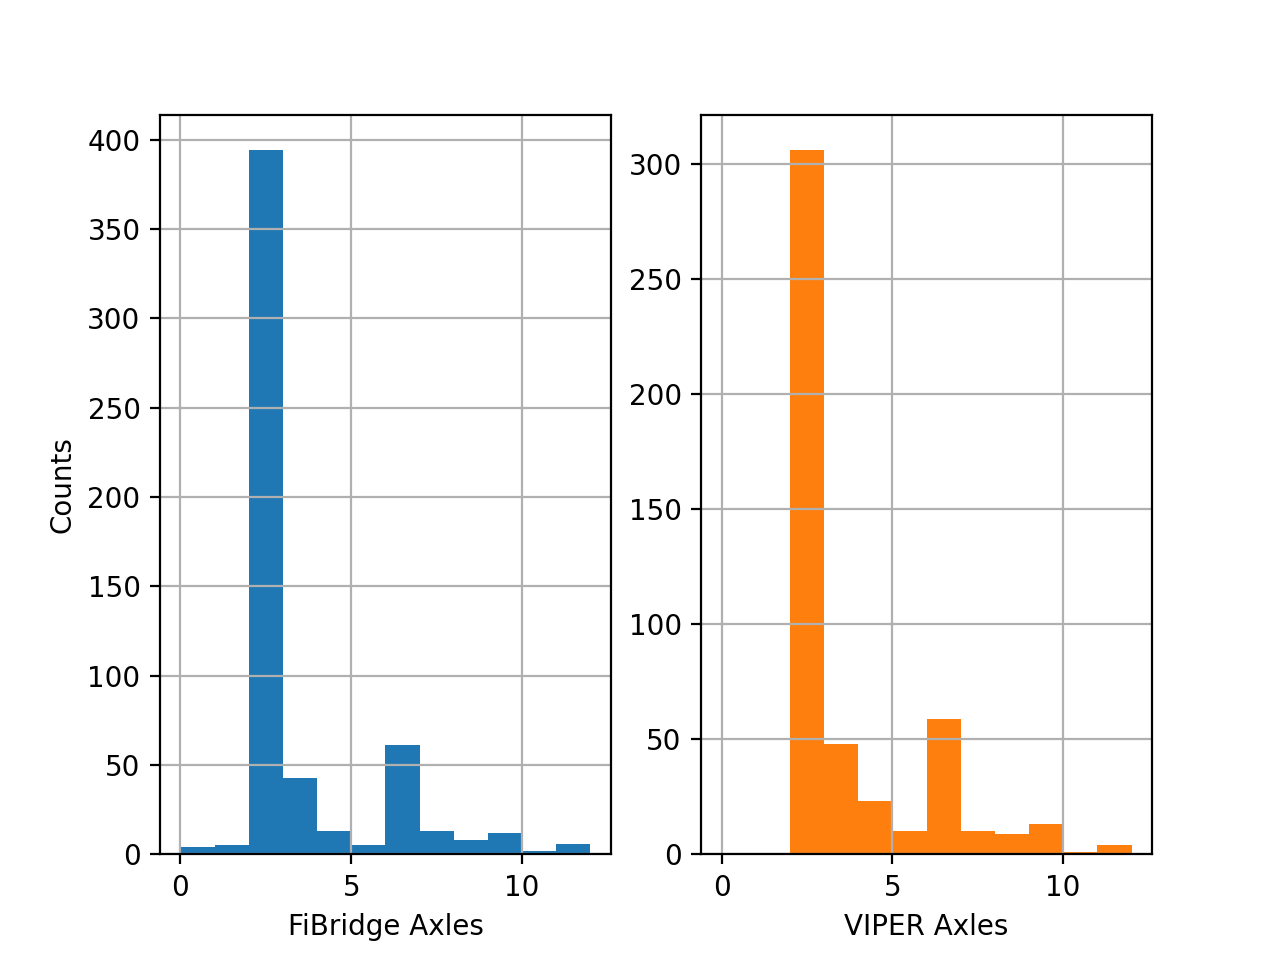

Text(0.5, 0, 'VIPER Axles')

In [6]:
plt.figure()
plt.clf()
plt.subplot(1,2,1)
plt.hist(ax_count, bins=np.linspace(0, 12, 13))
plt.xlabel('FiBridge Axles')
plt.grid()
plt.ylabel('Counts')
plt.subplot(1,2,2)
plt.hist(ref_index, bins=np.linspace(0,12,13), color='C1')
plt.grid()
plt.xlabel('VIPER Axles')

event462, ax count11


<IPython.core.display.Javascript object>


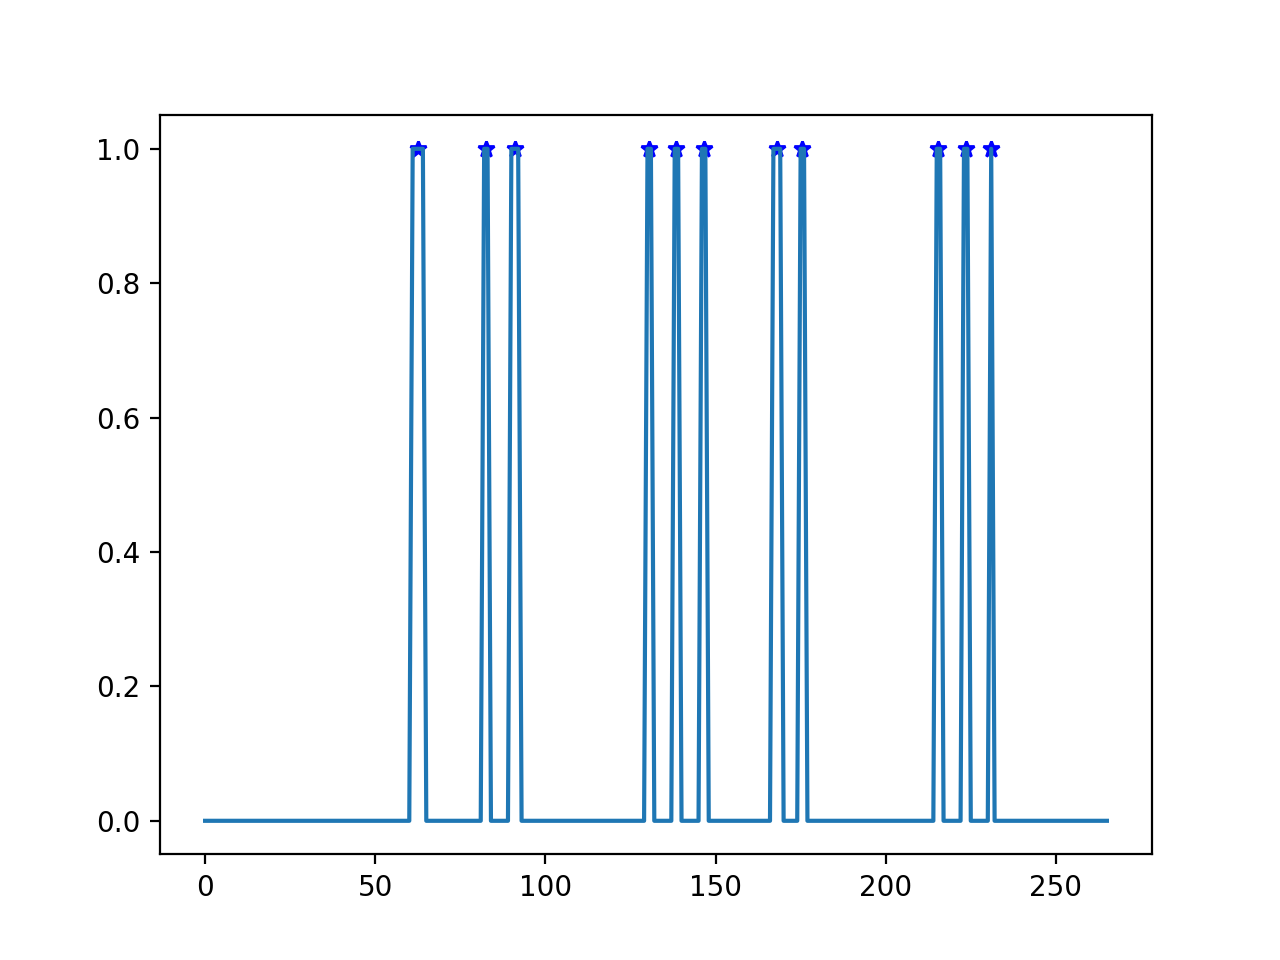

<IPython.core.display.Javascript object>


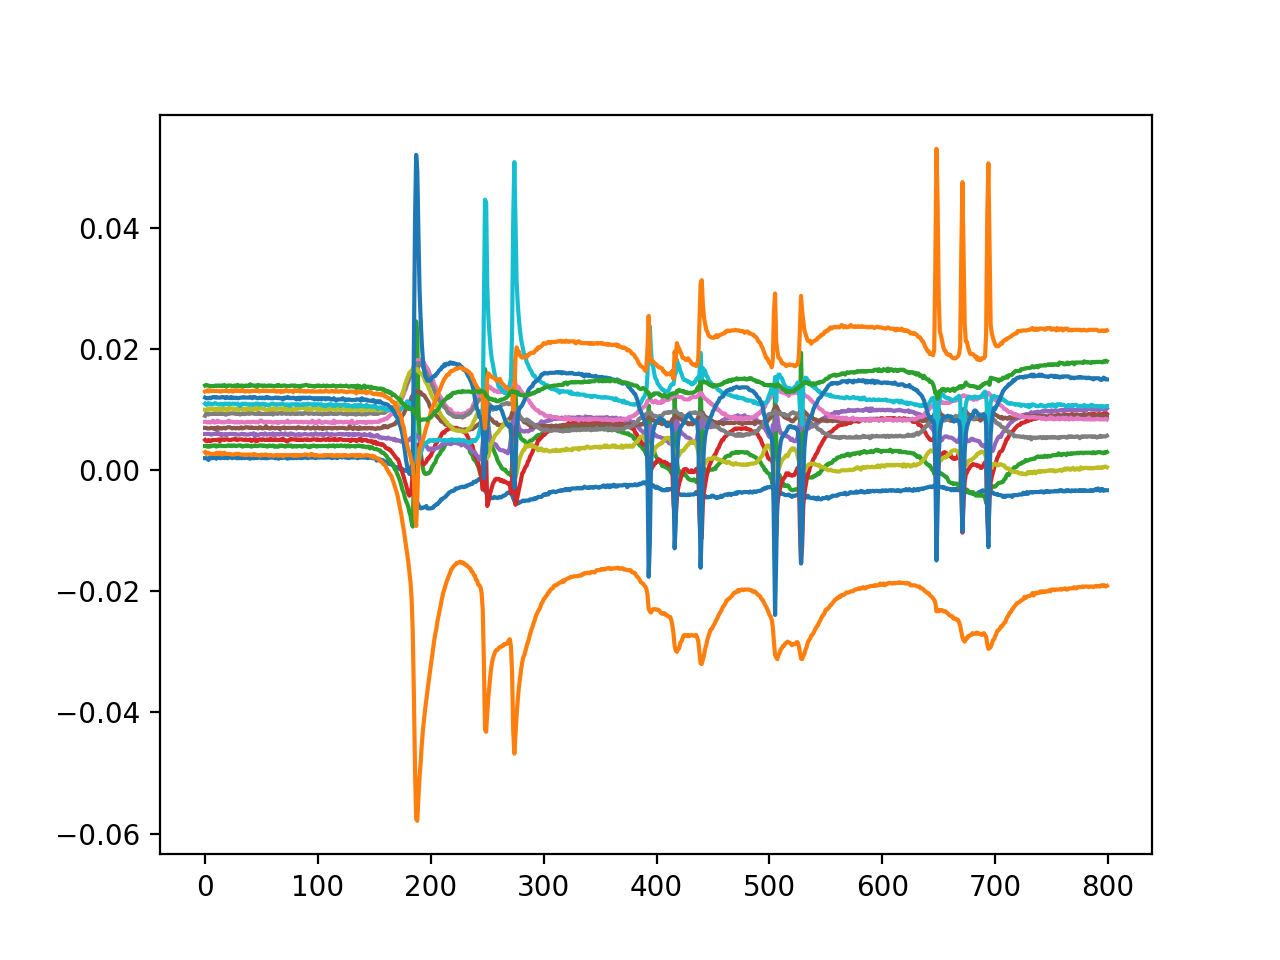

<IPython.core.display.Javascript object>


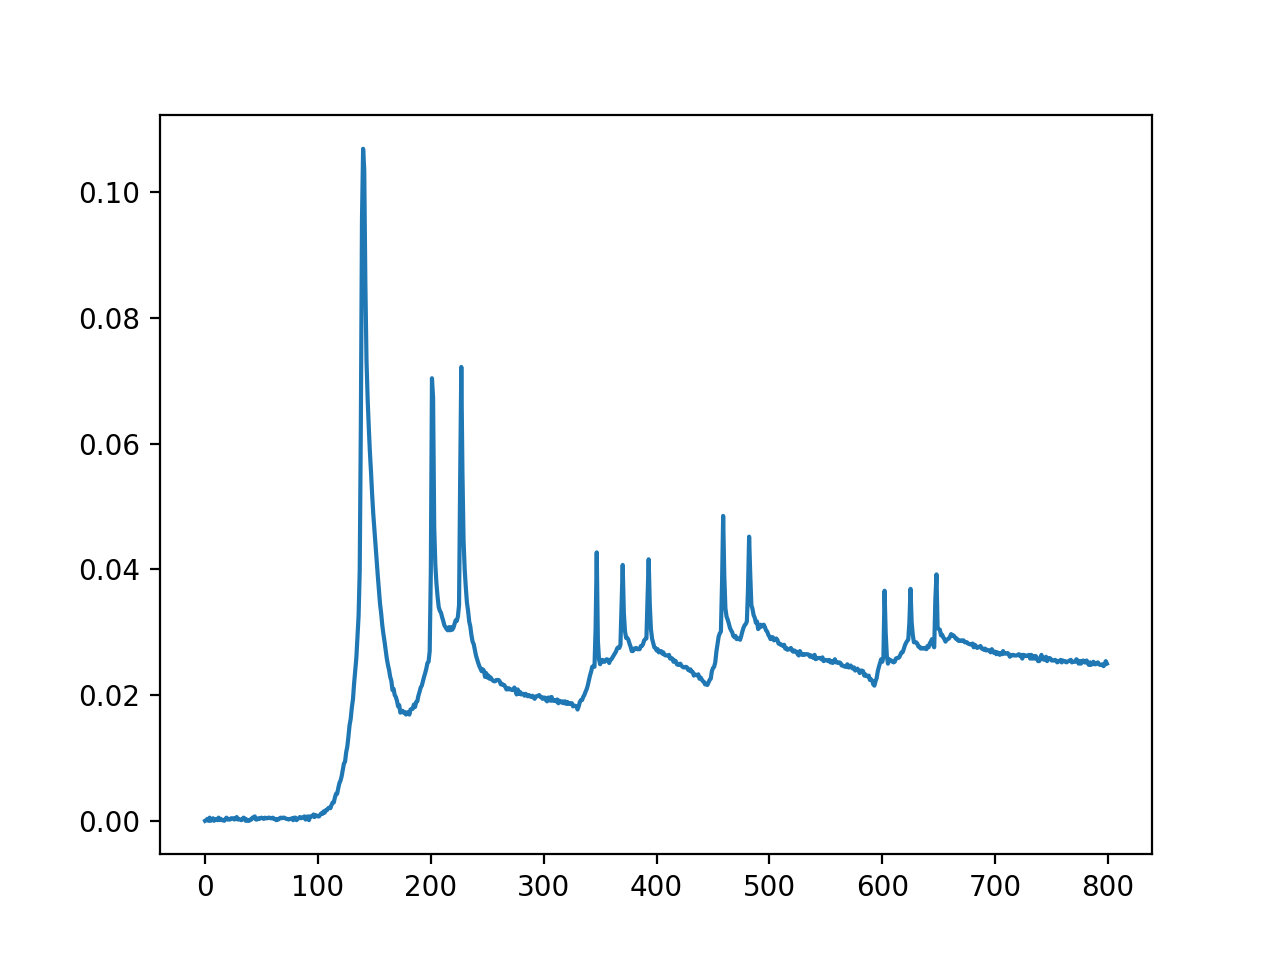

In [7]:
# look at individual event to tune parameters
i = 462
lane_sensor_1 = lane_sensor
sensor_temp = np.arange(0,11).tolist()

k_1 = np.min(events['events'][i].wav1[:, lane_sensor_1[0:7]], axis=0).argmin()
l_1 = np.min(events['events'][i].wav1[:, lane_sensor_1[5:]], axis=0).argmin()
k_2 = np.min(events['events'][i].wav2[:, lane_sensor_1[0:7]], axis=0).argmin()
l_2 = np.min(events['events'][i].wav2[:, lane_sensor_1[5:]], axis=0).argmin()
trace_temp1 = np.abs(events['events'][i].wav1[:,lane_sensor_1[k_1]]) + np.abs(events['events'][i].wav1[:,lane_sensor_1[5+l_1]])
trace_temp2 = np.abs(events['events'][i].wav2[:,lane_sensor_1[k_2]]) + np.abs(events['events'][i].wav2[:,lane_sensor_1[5+l_2]])

axle_filter_1 = event_detection(trace_temp1, threshold=0.003, seg_length=3)
axle_filter_2 = event_detection(trace_temp2, threshold=0.003, seg_length=3)
ax_count_1 = signal.find_peaks(axle_filter_1,prominence=0.5, distance=3)
ax_count_2 = signal.find_peaks(axle_filter_2,prominence=0.5, distance=3)
ax_count = np.max([len(ax_count_1[0]), len(ax_count_2[0])])
if ax_count < 2:
    axle_filter_1 = event_detection(trace_temp1, threshold=0.0005, seg_length=3)
    axle_filter_2 = event_detection(trace_temp2, threshold=0.0005, seg_length=3)
    ax_count_1 = signal.find_peaks(axle_filter_1,prominence=0.5, distance=3)
    ax_count_2 = signal.find_peaks(axle_filter_2,prominence=0.5, distance=3)
    ax_count = np.min([len(ax_count_1[0]), len(ax_count_2[0])])
#     print(ax_count)
ax_list[i]=ax_count
print('event{}, ax count{}'.format(i, ax_count))

plt.figure()
plt.clf()
plt.plot((ax_count_2[1]['left_bases']+ax_count_2[1]['right_bases'])/2, [1]*len(ax_count_2[0]),  '*b')
plt.plot(axle_filter_2)

plt.figure()
plt.clf()
for j in lane_sensor_1:
#     plt.plot(event_list[j].data['timestamp'].astype('datetime64'), np.asarray(event_list[j].data['leading'].iloc[:,i]) - event_list[j].data['leading'].iloc[0,i] + 0.001 * i)
    plt.plot(np.asarray(events['events'][i].wav2[:, j] + 0.001 * j))
#     plt.title('#{}. Timestamp: {}. Estimated speed {:2.2f} KPH'.format(j, event_prop_list[j].timestamp+datetime.timedelta(hours=11), event_prop_list[j].speed))
    
    
plt.figure()
plt.clf()
plt.plot(trace_temp1)